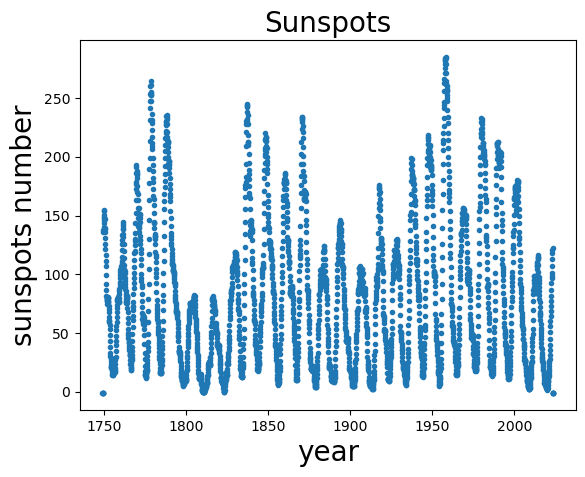

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
X = []
Y = []
with open('SN_ms_tot_V2.0.csv', 'r') as datafile:
    plotting = csv.reader(datafile, delimiter=';')

    for ROWS in plotting:
        X.append(float(ROWS[2]))
        Y.append(float(ROWS[3]))


plt.plot(X, Y, '.')
plt.title('Sunspots', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('sunspots number', fontsize=20)
plt.show()


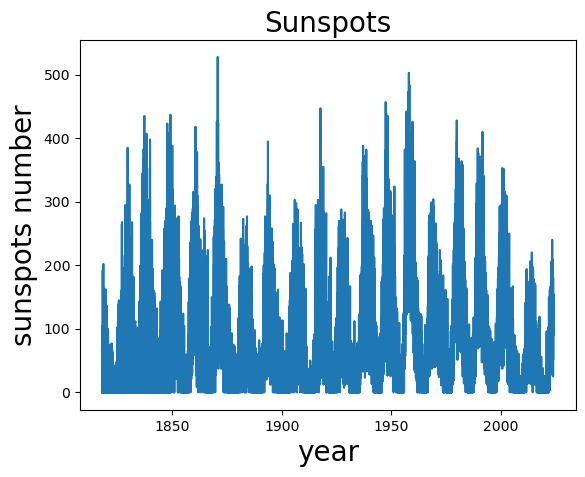

2015.738
72222
1862.73
16337
1862.84
76.16666666666667


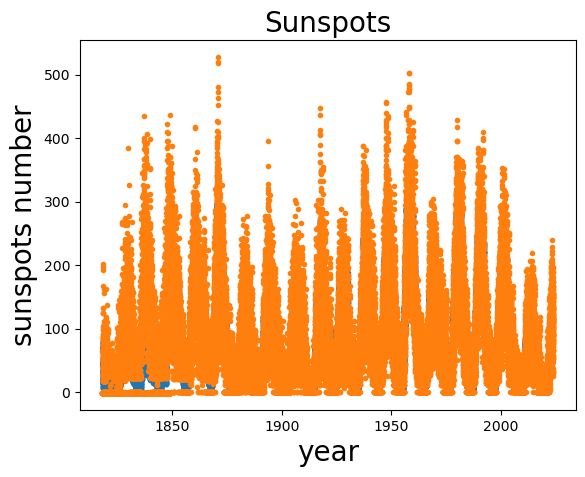

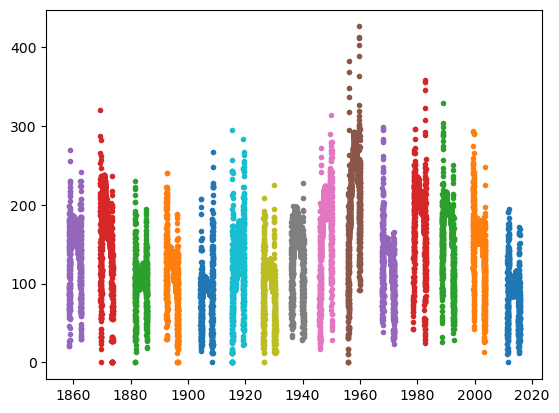

0


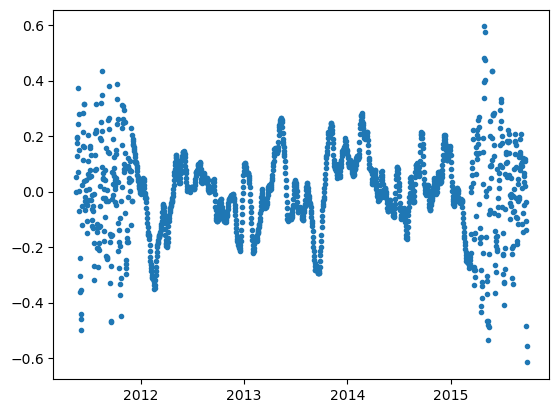

1


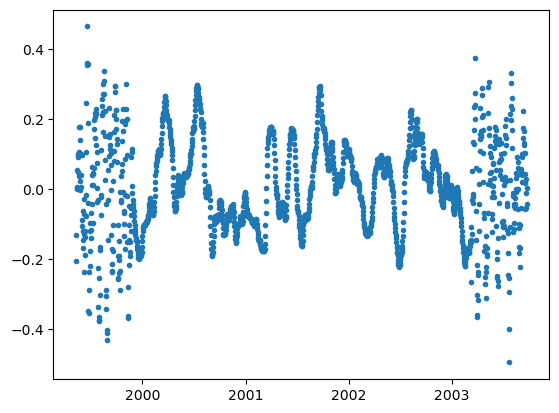

2


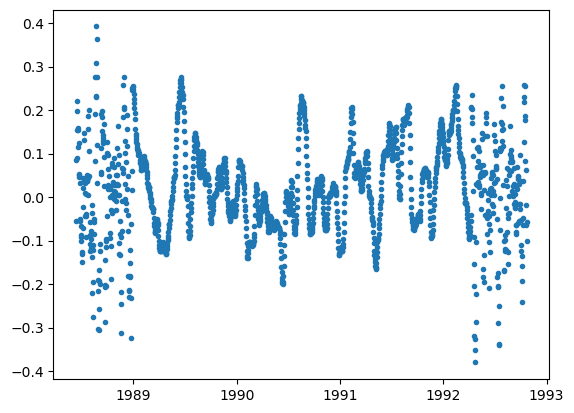

3


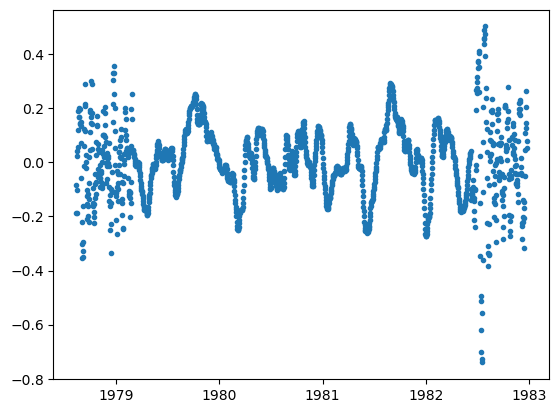

4


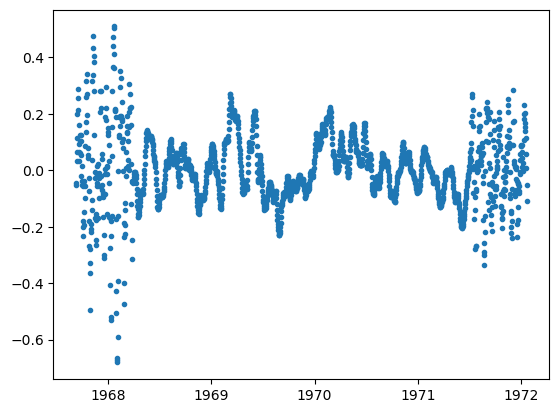

5


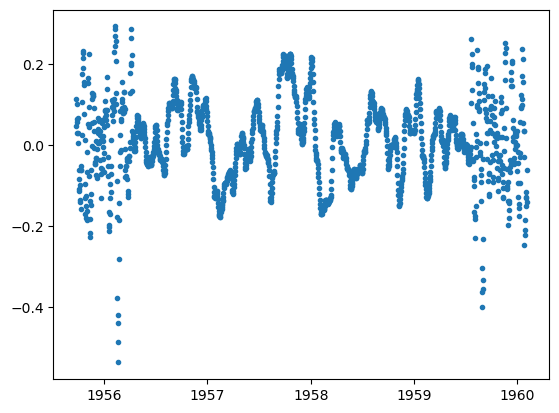

6


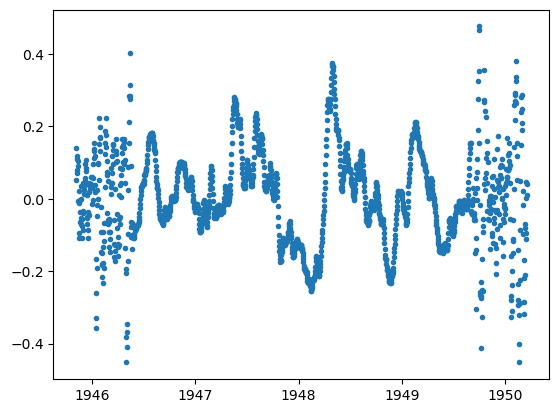

7


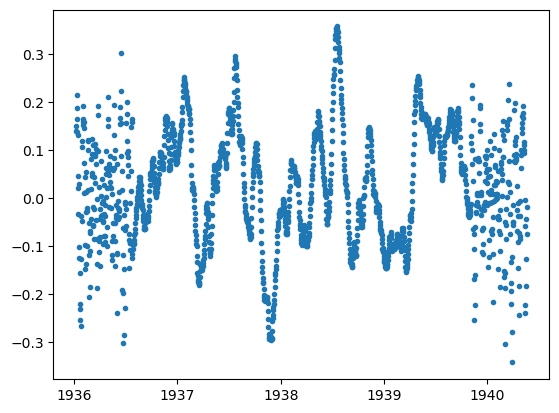

8


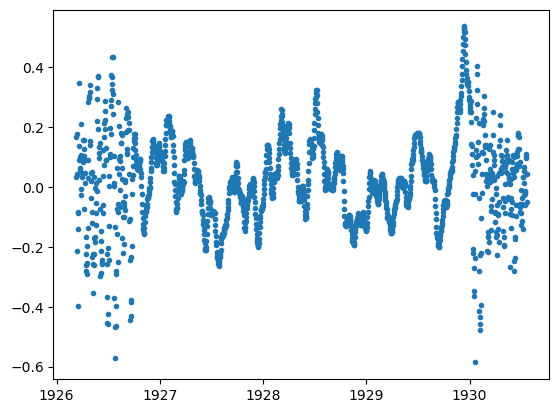

9


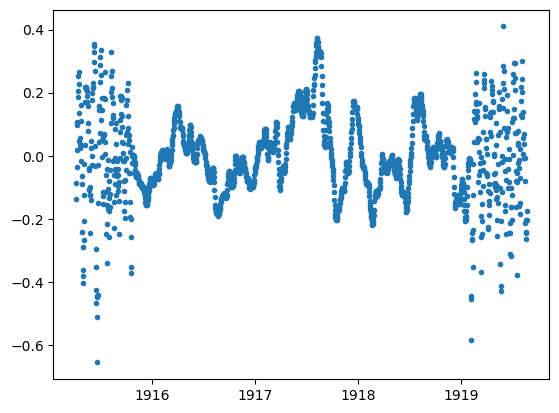

10


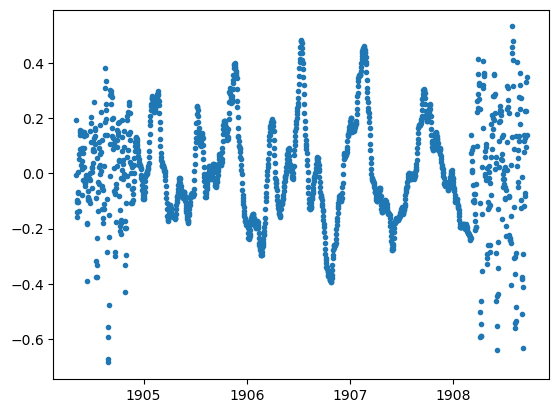

11


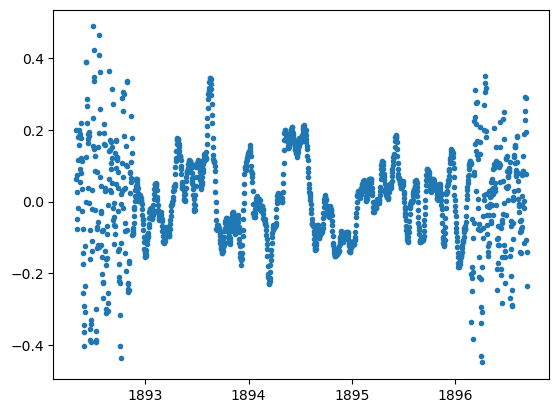

12


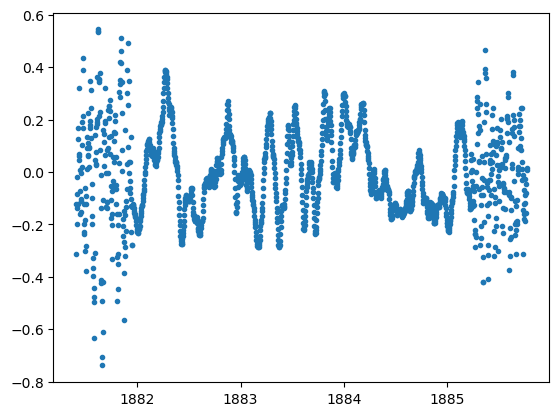

13


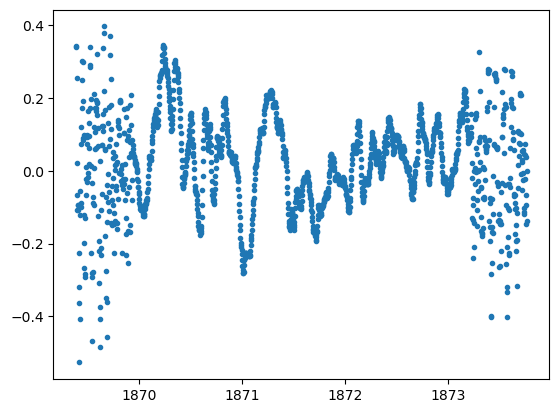

14


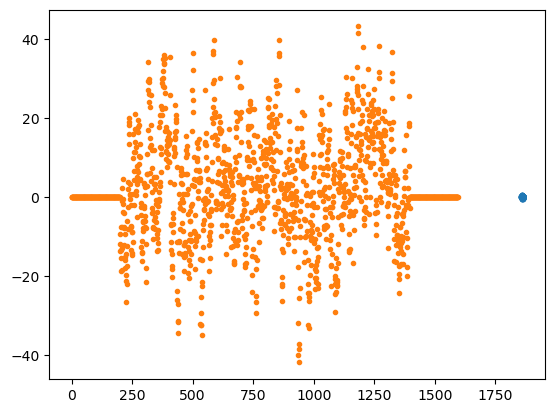

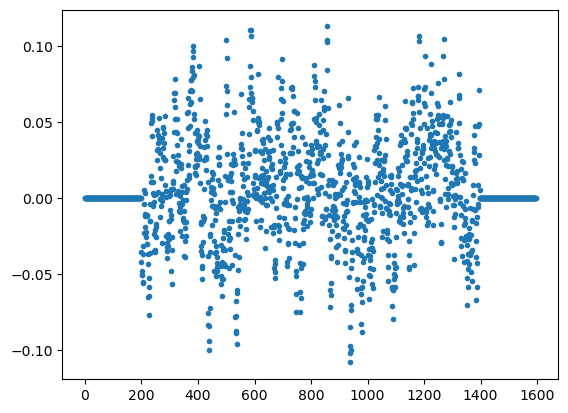

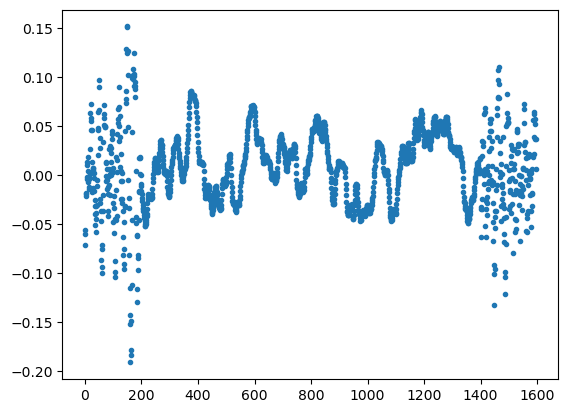

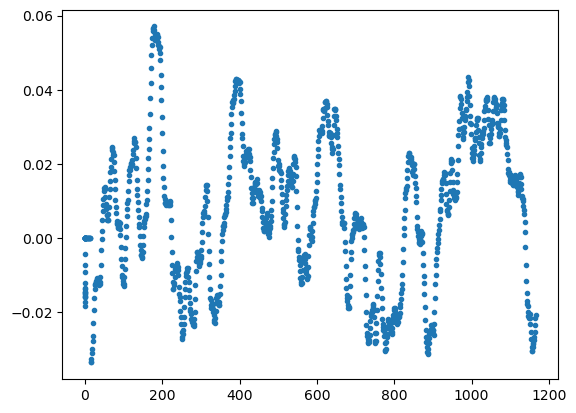

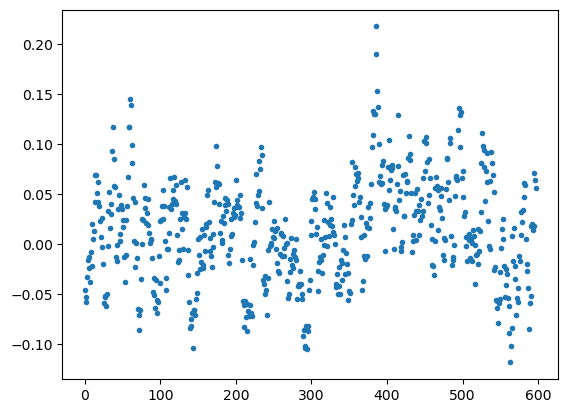

In [2]:
def find(X, x):
    for i in range(len(X)):
        if abs(X[i] - x)<=0.001:
            print(X[i])
            print(i)


X = []
Y = []
with open('SN_ms_tot_V2.0.csv', 'r') as datafile:
    plotting = csv.reader(datafile, delimiter=';')

    for ROWS in plotting:
        X.append(float(ROWS[2]))
        Y.append(float(ROWS[3]))

"""
plt.plot(X, Y, '.')
plt.title('Sunspots', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('sunspots number', fontsize=20)
plt.show()"""


# выявление юпитера по сглаженным среднемесячным
X_daily = []
Y_daily = []
Y_daily_smooth = [0]*72223 #за 30 дней
X_daily_smooth = [0]*72223
with open('SN_d_tot_V2.0.csv', 'r') as datafile:
    plotting = csv.reader(datafile, delimiter=';')

    for ROWS in plotting:
        X_daily.append(float(ROWS[3]))
        Y_daily.append(float(ROWS[4]))
plt.plot(X_daily, Y_daily)
plt.title('Sunspots', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('sunspots number', fontsize=20)
plt.show()
find(X_daily, 2015.7386)
find(X_daily, 1862.73)
print(X_daily[16377])


for i in range(0, 72223-15):
    s = 0
    for j in range(30):
        s += Y_daily[i+j]
    Y_daily_smooth[i+15] = s/30
    X_daily_smooth[i+15] = X_daily[i+15]
plt.plot(X_daily_smooth[15:72222], Y_daily_smooth[15:72222], '.')
print(Y_daily_smooth[72222])
plt.plot(X_daily, Y_daily, '.')
plt.title('Sunspots', fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('sunspots number', fontsize=20)
plt.show()
plt.show()

begin_number = [72222, 67834, 63848, 60257, 56270-3, 52095-197, 48289, 44699, 41109, 37120, 33131, 28743,
                24754, 20366, 16377]
J_year = [0]*20
J_sunspots = [0]*20
for k in range(len(begin_number)):
    J_year[k] = [0]*4*399
    J_sunspots[k] = [0]*4*399
    for i in range(4*399):
        J_year[k][i] = X_daily[begin_number[k] - i]
        J_sunspots[k][i] = Y_daily[begin_number[k] - i]
    for i in range(4*399 - 399+1):
        s = 0
        for j in range(399):
            s += J_sunspots[k][i+j]
        #print(s/(13*30))
        J_sunspots[k][i+199] = s/(399)
    plt.plot(J_year[k], J_sunspots[k], '.')
    #print(J_year[k])
    #plt.legend("J")
    #plt.show()

#print(J_year[0])# график разностей от сглаженных
J_diff = [0]*20
J_diff_part = [0]*20
J_diff_part_smooth = [0]*20
for k in range(len(begin_number)):
    m = 0
    M = 0
    J_diff[k] = [0]*4*399
    J_diff_part[k] = [0]*399*4
    J_diff_part_smooth[k] = [0]*399*4
    for n in range(399*4):
        if abs(Y_daily[begin_number[k]-n])>m:
            m = Y_daily[begin_number[k] - n]
        if abs(Y_daily_smooth[begin_number[k]-n])>M:
            M = Y_daily_smooth[begin_number[k]-n]
    for i in range(4*399):
        J_diff[k][i] = Y_daily[begin_number[k]-i] - J_sunspots[k][i]
        J_diff_part[k][i] = (Y_daily[begin_number[k] - i] - J_sunspots[k][i])/m
        J_diff_part_smooth[k][i] = (Y_daily_smooth[begin_number[k] - i] - J_sunspots[k][i])/M
    #plt.plot(J_year[k], J_diff_part_smooth[k], '.')
    plt.show()
    print(k)
    plt.plot(J_year[k], J_diff_part_smooth[k], '.')
    #plt.show()


# график разностей, каждый раз усредненние за 4 раза по 13 месяцев
J_diff_new = [0] * 399*4
J_diff_new_part = [0]*399*4
J_diff_new_smooth = [0]*399*4
J_year_new = [0] * 399*4
for i in range(399*4):
    J_year_new[i] = i
    s = 0
    t = 0
    tmp = 0
    for k in range(len(begin_number)):
        s += J_diff[k][i]
        t += J_diff_part[k][i]
        tmp += J_diff_part_smooth[k][i]
    J_diff_new[i] = s/len(begin_number)
    J_diff_new_part[i] = t/len(begin_number)
    J_diff_new_smooth[i] = tmp/len(begin_number)
plt.plot(J_year_new, J_diff_new, '.')
plt.show()
plt.plot(J_year_new, J_diff_new_part, '.')
plt.show()
plt.plot(J_year_new, J_diff_new_smooth, '.')
plt.show()


J_year_smooth = [0]*(399*3)
J_spots_smooth = [0]*399*3
for j in range(3*399-30):
    s=0
    J_year_smooth[j] = j
    for i in range(30):
        s += J_diff_new_part[i+j+199]
    J_spots_smooth[j+15] = s/30
plt.plot(J_year_smooth, J_spots_smooth, '.')
plt.show()


J_cut_year = [0]*598
J_cut_spots_1 = [0]*598
J_cut_spots_2 = [0]*598
J_cut_spots_final  = [0]*598
for i in range(598):
    J_cut_year[i] = i
    J_cut_spots_1[i] = J_diff_new_part[199+i]
    J_cut_spots_2[i] = J_diff_new_part[199 + i + 598]
    J_cut_spots_final[i] = J_cut_spots_1[i]+J_cut_spots_2[i]
plt.plot(J_cut_year, J_cut_spots_final, '.')
plt.show()